<a href="https://colab.research.google.com/github/Sayak-coder/Student-Performance-Analyzer/blob/main/student_performance_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
np.set_printoptions(suppress=True)

In [ ]:
df= pd.read_csv('/content/xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
df.shape

(480, 17)

In [ ]:
df.columns=df.columns.str.lower()
df.columns

Index(['gender', 'nationality', 'placeofbirth', 'stageid', 'gradeid',
       'sectionid', 'topic', 'semester', 'relation', 'raisedhands',
       'visitedresources', 'announcementsview', 'discussion',
       'parentansweringsurvey', 'parentschoolsatisfaction',
       'studentabsencedays', 'class'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
gender,0
nationality,0
placeofbirth,0
stageid,0
gradeid,0
sectionid,0
topic,0
semester,0
relation,0
raisedhands,0


In [ ]:
df.duplicated().sum()

np.int64(2)

In [ ]:
df=df.drop_duplicates()
df.duplicated().sum(),df.shape

(np.int64(0), (478, 17))

In [ ]:
df.columns

Index(['gender', 'nationality', 'placeofbirth', 'stageid', 'gradeid',
       'sectionid', 'topic', 'semester', 'relation', 'raisedhands',
       'visitedresources', 'announcementsview', 'discussion',
       'parentansweringsurvey', 'parentschoolsatisfaction',
       'studentabsencedays', 'class'],
      dtype='object')

In [ ]:
df['class'].value_counts()

,count
class,
M,211
H,142
L,125


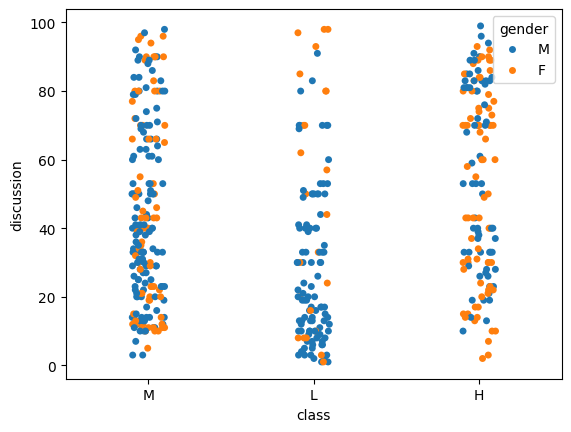

In [ ]:
sns.stripplot(x='class',y='discussion',data=df,hue='gender')
plt.show()

So here we can see that those who have low overall grade visited the discussion tab least .


In [ ]:
df['sectionid'].value_counts()

,count
sectionid,
A,281
B,167
C,30


In [ ]:
df['placeofbirth'].value_counts()

,count
placeofbirth,
KuwaIT,180
Jordan,174
Iraq,22
lebanon,19
USA,16
SaudiArabia,16
Palestine,10
Egypt,9
Tunis,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    478 non-null    object
 1   nationality               478 non-null    object
 2   placeofbirth              478 non-null    object
 3   stageid                   478 non-null    object
 4   gradeid                   478 non-null    object
 5   sectionid                 478 non-null    object
 6   topic                     478 non-null    object
 7   semester                  478 non-null    object
 8   relation                  478 non-null    object
 9   raisedhands               478 non-null    int64 
 10  visitedresources          478 non-null    int64 
 11  announcementsview         478 non-null    int64 
 12  discussion                478 non-null    int64 
 13  parentansweringsurvey     478 non-null    object
 14  parentschoolsatisfaction  478 n

In [ ]:
encode = df.select_dtypes(include='object').columns
encode=encode.drop('class')
encode

Index(['gender', 'nationality', 'placeofbirth', 'stageid', 'gradeid',
       'sectionid', 'topic', 'semester', 'relation', 'parentansweringsurvey',
       'parentschoolsatisfaction', 'studentabsencedays'],
      dtype='object')

In [ ]:
for e in encode:
  print(e,"-->",df[e].unique())

gender --> ['M' 'F']
nationality --> ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
placeofbirth --> ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
stageid --> ['lowerlevel' 'MiddleSchool' 'HighSchool']
gradeid --> ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
sectionid --> ['A' 'B' 'C']
topic --> ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
semester --> ['F' 'S']
relation --> ['Father' 'Mum']
parentansweringsurvey --> ['Yes' 'No']
parentschoolsatisfaction --> ['Good' 'Bad']
studentabsencedays --> ['Under-7' 'Above-7']


In [ ]:
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

df['semester'] = df['semester'].map({'F': 0, 'S': 1})

df['relation'] = df['relation'].map({'Father': 1, 'Mum': 0})

df['parentansweringsurvey'] = df['parentansweringsurvey'].map({'Yes': 1, 'No': 0})

df['parentschoolsatisfaction'] = df['parentschoolsatisfaction'].map({'Good': 1, 'Bad': 0})

df['studentabsencedays'] = df['studentabsencedays'].map({'Under': 0, 'Above': 1})

df['nationality'] = df['nationality'].map({'KW':0,'lebanon':1, 'Egypt':2, 'SaudiArabia':3, 'USA':4,'Jordan':5,
                                           'venzuela':6, 'Iran':7,'Tunis':8, 'Morocco':9, 'Syria':10,
                                           'Palestine':11, 'Iraq':12, 'Lybia':13})

df['stageid'] = df['stageid'].map({'lowerlevel': 0, 'MiddleSchool': 1,'HighSchool':2})

df['sectionid'] = df['sectionid'].map({'A': 0, 'B': 1,'C':2})


In [ ]:
col_to_drop=['gradeid','placeofbirth']
df=df.drop(col_to_drop,axis=1)

In [ ]:
df=pd.get_dummies(df,columns=['topic'],drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 479
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    478 non-null    int64  
 1   nationality               478 non-null    int64  
 2   stageid                   478 non-null    int64  
 3   sectionid                 478 non-null    int64  
 4   semester                  478 non-null    int64  
 5   relation                  478 non-null    int64  
 6   raisedhands               478 non-null    int64  
 7   visitedresources          478 non-null    int64  
 8   announcementsview         478 non-null    int64  
 9   discussion                478 non-null    int64  
 10  parentansweringsurvey     478 non-null    int64  
 11  parentschoolsatisfaction  478 non-null    int64  
 12  studentabsencedays        0 non-null      float64
 13  class                     478 non-null    object 
 14  topic_Biology  

In [ ]:
bool_cols=df.select_dtypes(include='bool').columns
df[bool_cols]=df[bool_cols].astype(int)

In [ ]:
df['grade']=df['class'].map({"L":0,"M":1,"H":2})
df.drop('class',axis=1,inplace=True)
df.head(2)

,gender,nationality,stageid,sectionid,semester,relation,raisedhands,visitedresources,announcementsview,discussion,...,topic_English,topic_French,topic_Geology,topic_History,topic_IT,topic_Math,topic_Quran,topic_Science,topic_Spanish,grade
0,1,0,0,0,0,1,15,16,2,20,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,1,20,20,3,25,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
df['studentabsencedays'].unique()

array([nan])

In [ ]:
df=df.drop('studentabsencedays',axis=1)

In [ ]:
df.describe()

,gender,nationality,stageid,sectionid,semester,relation,raisedhands,visitedresources,announcementsview,discussion,...,topic_English,topic_French,topic_Geology,topic_History,topic_IT,topic_Math,topic_Quran,topic_Science,topic_Spanish,grade
count,478.000,478.000,478.000,478.000,478.000,478.000,478.000,478.000,478.000,478.000,...,478.000,478.000,478.000,478.000,478.000,478.000,478.000,478.000,478.000,478.000
mean,0.634,3.854,0.657,0.475,0.490,0.588,46.887,54.975,38.015,43.410,...,0.094,0.132,0.050,0.040,0.199,0.044,0.046,0.107,0.052,1.036
std,0.482,3.856,0.604,0.613,0.500,0.493,30.788,33.035,26.624,27.621,...,0.292,0.339,0.219,0.196,0.399,0.205,0.210,0.309,0.223,0.747
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,16.000,20.000,14.250,20.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,5.000,1.000,0.000,0.000,1.000,50.000,65.000,33.000,39.500,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,1.000,5.000,1.000,1.000,1.000,1.000,75.000,84.000,58.000,70.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
max,1.000,13.000,2.000,2.000,1.000,1.000,100.000,99.000,98.000,99.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000


In [ ]:
X=df.drop('grade',axis=1)
y=df['grade']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

col_to_scale=['discussion','raisedhands','visitedresources','announcementsview']
scaler=MinMaxScaler()
X[col_to_scale]=scaler.fit_transform(X[col_to_scale])
X.describe()

,gender,nationality,stageid,sectionid,semester,relation,raisedhands,visitedresources,announcementsview,discussion,...,topic_Chemistry,topic_English,topic_French,topic_Geology,topic_History,topic_IT,topic_Math,topic_Quran,topic_Science,topic_Spanish
count,478.000,478.000,478.000,478.000,478.000,478.000,478.000,478.000,478.000,478.000,...,478.000,478.000,478.000,478.000,478.000,478.000,478.000,478.000,478.000,478.000
mean,0.634,3.854,0.657,0.475,0.490,0.588,0.469,0.555,0.388,0.433,...,0.050,0.094,0.132,0.050,0.040,0.199,0.044,0.046,0.107,0.052
std,0.482,3.856,0.604,0.613,0.500,0.493,0.308,0.334,0.272,0.282,...,0.219,0.292,0.339,0.219,0.196,0.399,0.205,0.210,0.309,0.223
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.160,0.202,0.145,0.194,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,5.000,1.000,0.000,0.000,1.000,0.500,0.657,0.337,0.393,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,1.000,5.000,1.000,1.000,1.000,1.000,0.750,0.848,0.592,0.704,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.000,13.000,2.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_lgr = LogisticRegression()
model_lgr.fit(X_train,y_train)
y_pred=model_lgr.predict(X_test)
result=classification_report(y_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.67      0.79      0.72        33
           1       0.65      0.62      0.63        68
           2       0.62      0.58      0.60        43

    accuracy                           0.65       144
   macro avg       0.65      0.66      0.65       144
weighted avg       0.64      0.65      0.64       144



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

0.3958333333333333

In [ ]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()

model_xgb.fit(X_train,y_train)

y_pred=model_xgb.predict(X_test)
result=classification_report(y_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.70      0.71      0.70        68
           2       0.67      0.60      0.63        43

    accuracy                           0.71       144
   macro avg       0.71      0.72      0.72       144
weighted avg       0.71      0.71      0.71       144

